In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import pandas as pd

In [2]:
Ticker = "MSFT"
start_date = dt.date(2010,1,1)
interval = "1d"
data = yf.download(tickers=Ticker,start= start_date,interval= interval)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2010-01-04,23.130056,23.242157,22.861015,22.883435,38409100
2010-01-05,23.137524,23.242152,22.898376,23.055318,49749600
2010-01-06,22.995529,23.227203,22.808695,23.077735,58182400
2010-01-07,22.756390,22.943224,22.562082,22.890909,50559700
2010-01-08,22.913326,23.077740,22.599445,22.629339,51197400


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4053 entries, 2010-01-04 to 2026-02-12
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   4053 non-null   float64
 1   (High, MSFT)    4053 non-null   float64
 2   (Low, MSFT)     4053 non-null   float64
 3   (Open, MSFT)    4053 non-null   float64
 4   (Volume, MSFT)  4053 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 190.0 KB


In [4]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
count,4053.000000,4053.000000,4053.000000,4053.000000,4.053000e+03
mean,151.765553,153.144905,150.257662,151.744824,3.532059e+07
std,147.109519,148.385352,145.740049,147.134014,2.058882e+07
min,17.354570,17.588380,17.143391,17.414910,5.855900e+06
25%,31.030251,31.212790,30.821405,31.021956,2.196780e+07
50%,81.796516,83.032768,80.863235,81.787297,2.938740e+07
75%,254.884949,257.757306,251.096586,253.967634,4.319310e+07
max,541.057373,553.502444,539.759814,553.283183,3.193179e+08


In [5]:
val = data["Close"].squeeze()
ret = val.pct_change()

df = pd.DataFrame({"Close":val,"return":ret}, index=data.index).dropna()
df.index = pd.to_datetime(df.index)
df

,Close,return
Date,,
2010-01-05,23.137524,0.000323
2010-01-06,22.995529,-0.006137
2010-01-07,22.756390,-0.010399
2010-01-08,22.913326,0.006896
2010-01-11,22.621872,-0.012720
...,...,...
2026-02-06,401.140015,0.018975
2026-02-09,413.600006,0.031061
2026-02-10,413.269989,-0.000798


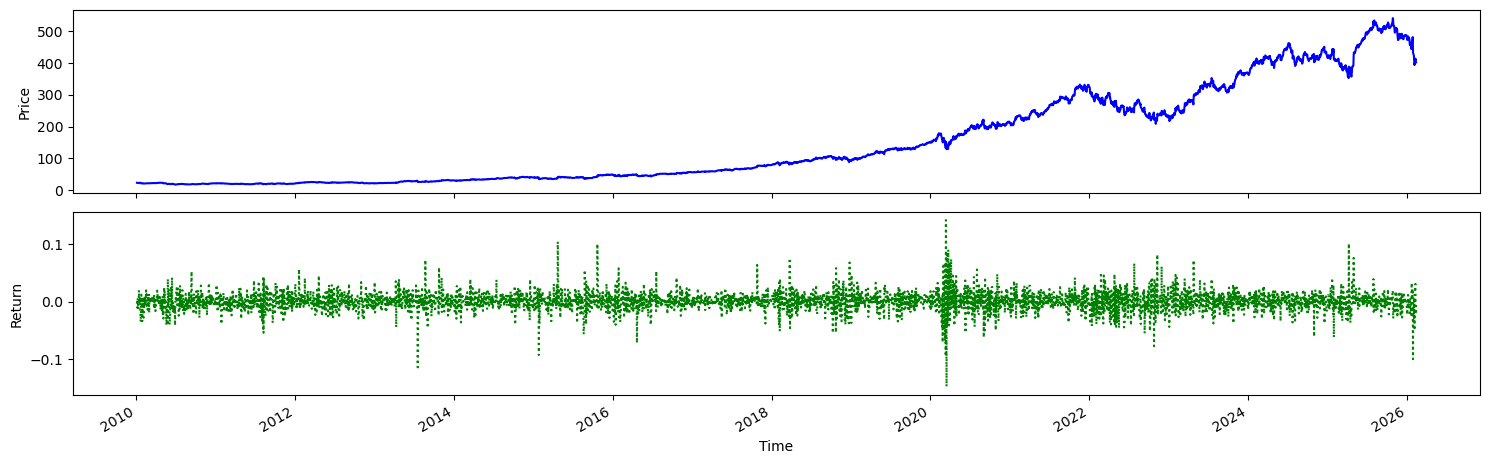

In [6]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize = (15,5),sharex=True)

ax[0].plot(df.index,df.Close, linestyle = "-", color = "blue")
ax[0].set_ylabel("Price")

ax[1].plot(df.index,df["return"], linestyle = ":", color = "green")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Return")

plt.tight_layout()
fig.autofmt_xdate() 
plt.show()

In [7]:
split = int(len(df) * 0.8)
split

3241

In [8]:
train = df.iloc[:split]
test = df.iloc[split:]

In [9]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

# Prediction using historical mean

In [10]:
hist_mean = np.mean(train.loc[:,"Close"].values)
test.loc[:,"Hist_mean_pred"] = hist_mean
print(f"Historical mean value is: {round(hist_mean,2)}")

Historical mean value is: 91.77


C:\Users\danie\AppData\Local\Temp\ipykernel_12256\2885677826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,"Hist_mean_pred"] = hist_mean


In [11]:
hist_mean_mape = MAPE(test.loc[:,"Close"], test.loc[:,"Hist_mean_pred"])
print(f"Mape: {round(hist_mean_mape,2)}%")

Mape: 75.42%


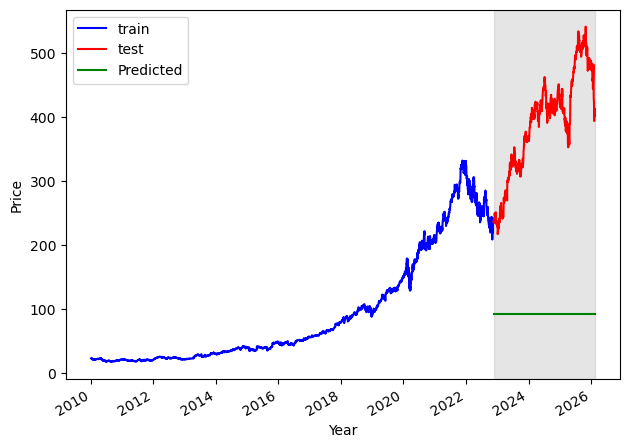

In [12]:
fig , ax = plt.subplots()

ax.plot(train.index, train["Close"],color = "blue", label = "train")
ax.plot(test.index, test["Close"],color = "red", label = "test")
ax.plot(test.index, test["Hist_mean_pred"], color = "green", label = "Predicted")
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.legend(loc = "best")
ax.axvspan(xmin = test.index[0], xmax=test.index[-1],color = "grey", alpha = 0.2)

plt.tight_layout()
fig.autofmt_xdate() 
plt.show()

# Prediction using last year mean

In [13]:
df_2025 = df.loc["2025"]
df_2025

,Close,return
Date,,
2025-01-02,415.514832,-0.006928
2025-01-03,420.249878,0.011396
2025-01-06,424.716949,0.010630
2025-01-07,419.277069,-0.012808
2025-01-08,421.451019,0.005185
...,...,...
2025-12-24,488.019989,0.002403
2025-12-26,487.709991,-0.000635
2025-12-29,487.100006,-0.001251


In [14]:
last_year_mean = np.mean(df_2025.values)
test.loc[:,"last_year_mean_pred"] = last_year_mean
print(f"Last year mean {round(last_year_mean,2)}")

Last year mean 231.42


C:\Users\danie\AppData\Local\Temp\ipykernel_12256\4000410074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,"last_year_mean_pred"] = last_year_mean


In [15]:
last_year_mean_mape = MAPE(test.loc[:,"Close"], test.loc[:,"last_year_mean_pred"])
print(f"Mape: {round(last_year_mean_mape,2)}%")

Mape: 38.09%


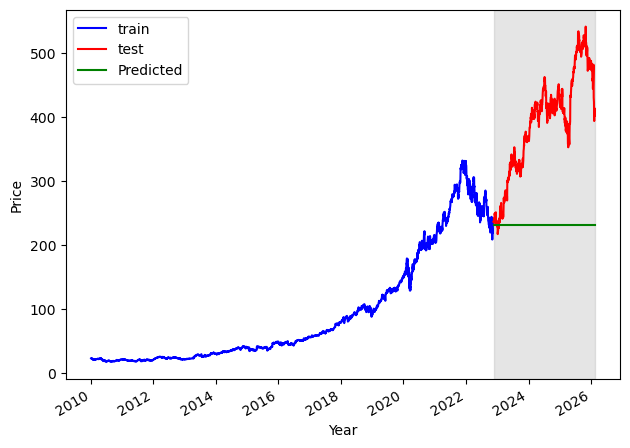

In [16]:
fig , ax = plt.subplots()

ax.plot(train.index, train["Close"],color = "blue", label = "train")
ax.plot(test.index, test["Close"],color = "red", label = "test")
ax.plot(test.index, test["last_year_mean_pred"], color = "green", label = "Predicted")
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.legend(loc = "best")
ax.axvspan(xmin = test.index[0], xmax=test.index[-1],color = "grey", alpha = 0.2)

plt.tight_layout()
fig.autofmt_xdate() 
plt.show()

# Prediction using last known value

In [17]:
last_know_value = train["Close"].iloc[-1]
print(f"Last known value is: {last_know_value}")
test.loc[:,"last_known_value"] = last_know_value

Last known value is: 236.08543395996094


C:\Users\danie\AppData\Local\Temp\ipykernel_12256\2169454477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,"last_known_value"] = last_know_value


In [18]:
last_year_known_mape = MAPE(test.loc[:,"Close"], test.loc[:,"last_known_value"])
print(f"Mape: {round(last_year_mean_mape,2)}%")

Mape: 38.09%


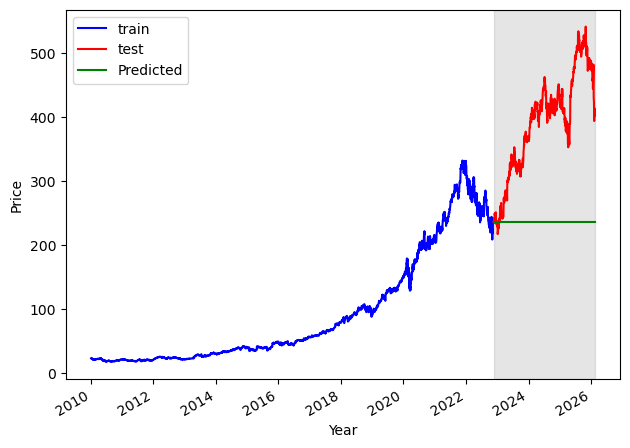

In [19]:
fig , ax = plt.subplots()

ax.plot(train.index, train["Close"],color = "blue", label = "train")
ax.plot(test.index, test["Close"],color = "red", label = "test")
ax.plot(test.index, test["last_known_value"], color = "green", label = "Predicted")
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.legend(loc = "best")
ax.axvspan(xmin = test.index[0], xmax=test.index[-1],color = "grey", alpha = 0.2)

plt.tight_layout()
fig.autofmt_xdate() 
plt.show()

# Naive Seasonal Forecast

In [20]:
period = 5   # weekly trading cycle (Mon–Fri)
last_season_value = train["Close"].iloc[-period:].values
last_season_value


array([236.63937378, 240.66160583, 235.24665833, 235.65570068,
       236.08543396])

In [21]:
test["last_season_value"] = np.tile(last_season_value,len(test))[:len(test)]

C:\Users\danie\AppData\Local\Temp\ipykernel_12256\746138775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["last_season_value"] = np.tile(last_season_value,len(test))[:len(test)]


In [22]:
naive_season_mape = MAPE(test.loc[:,"Close"], test.loc[:,"last_season_value"])
print(f"Mape: {round(last_year_mean_mape,2)}%")

Mape: 38.09%


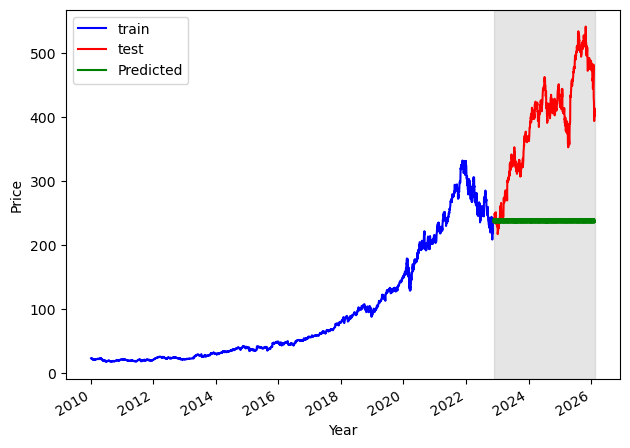

In [23]:
fig , ax = plt.subplots()

ax.plot(train.index, train["Close"],color = "blue", label = "train")
ax.plot(test.index, test["Close"],color = "red", label = "test")
ax.plot(test.index, test["last_season_value"], color = "green", label = "Predicted")
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.legend(loc = "best")
ax.axvspan(xmin = test.index[0], xmax=test.index[-1],color = "grey", alpha = 0.2)

plt.tight_layout()
fig.autofmt_xdate() 
plt.show()

# Summary

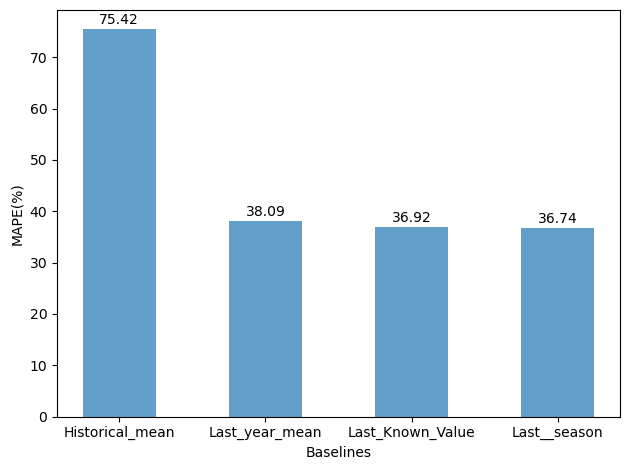

In [24]:
fig, ax = plt.subplots()

x = ["Historical_mean","Last_year_mean","Last_Known_Value","Last__season"]
y = [hist_mean_mape,last_year_mean_mape,last_year_known_mape,naive_season_mape]

ax.bar(x,y,width = 0.5, alpha = 0.7)
ax.set_xlabel("Baselines")
ax.set_ylabel("MAPE(%)")

for index,value in enumerate(y):
    plt.text(x = index, y = value+1, s = str(round(value,2)),ha = "center")

plt.tight_layout()

plt.show()